# Chapter 4 Training models
## Logistic regression
Try it on the iris dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [84]:
import numpy as np
X = iris['data'][:, 2:4]
y = (iris["target"] == 2).astype(np.int) # boolean for Iris-Virginica


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [86]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)

confmat_train = confusion_matrix(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

[[79  2]
 [ 3 36]]
0.9230769230769231 0.9473684210526315 0.935064935064935


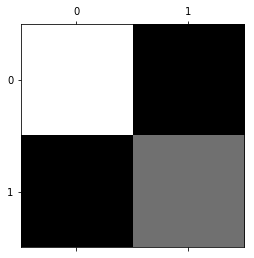

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
print(confmat_train)
print(recall_train, precision_train, f1_train)
plt.matshow(confmat, cmap = plt.cm.gray)

[[19  0]
 [ 0 11]]
1.0 1.0 1.0


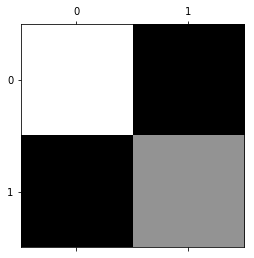

In [88]:
log_reg.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)

confmat_test = confusion_matrix(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(confmat_test)
print(recall_test, precision_test, f1_test)
plt.matshow(confmat_test, cmap = plt.cm.gray)

Text(0.5,1,'Learning curves')

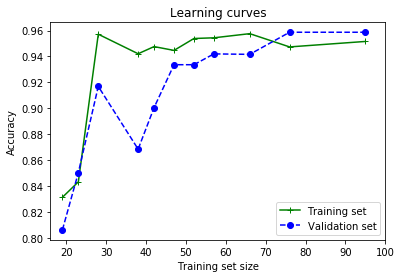

In [89]:
from sklearn.model_selection import learning_curve

set_size, train_scores, test_scores = learning_curve(log_reg, X=X_train, y=y_train, cv=5, scoring="accuracy", train_sizes=np.array([ 0.2, 0.25, 0.30, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 1. ]))
plt.plot(set_size, np.mean(train_scores, axis=1), "g-+", label="Training set")
plt.plot(set_size, np.mean(test_scores, axis=1), "b--o", label="Validation set")
plt.legend()
plt.xlim([16,100])
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning curves")

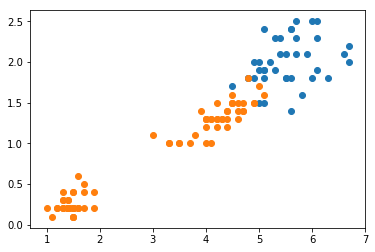

In [112]:
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1])
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1])

In [99]:
log_reg.coef_

array([[0.07659636, 2.19527295]])

In [113]:
LogisticRegression?